In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

from GeneticFeatures.GeneticFeatureGenerator import *
from GeneticFeatures.Node import *

from tester import *

In [7]:
def add(x, y):
    return x + y

def sub(x, y):
    return x - y

def mul(x, y):
    return x * y

def div(x, y):
    return x / (y + 1e-10)

def hyp(x, y):
    if isinstance(x, float) and isinstance(y, float):
        return np.hypot(x, y)
    if isinstance(x, float):
        x = np.ones_like(y) * x
    if isinstance(y, float):
        y = np.ones_like(x) * y
    return np.hypot(x, y)

def log(x, y):
    if isinstance(x, float) and isinstance(y, float):
        return np.log(np.hypot(x, y) + 1e-10)
    if isinstance(x, float):
        x = np.ones_like(y) * x
    if isinstance(y, float):
        y = np.ones_like(x) * y
    return np.log(np.hypot(x, y) + 1e-10)

In [8]:
generator = GeneticFeatureGenerator(
    [add, sub, mul, div, hyp, log],
    operation_names = ["+", "-", "*", "/", "hyp", "log"],
    popsize = 120, 
    maxiter = 250, 
    mutation_rate = 0.05,
    max_tree_depth = 10,
)

In [9]:
dataset = load_diabetes()
X = dataset.data
y = dataset.target
X.shape, y.shape

((442, 10), (442,))

In [10]:
tester = tester(X, y, generator, 10, 1, X.shape[0], verbose = True, test_size = 0.2, random_state = 13)

Split:  0 Feature:  0
Iteration:  249 Best fitness:  0.3518875192604006 Generation best 0.349142912172573214
Split:  0 Feature:  1
Iteration:  249 Best fitness:  0.38075404468412943 Generation best 0.36368451463790455
Split:  0 Feature:  2
Iteration:  249 Best fitness:  0.31594279661016944 Generation best 0.27554410631741144
Split:  0 Feature:  3
Iteration:  249 Best fitness:  0.38227080123266566 Generation best 0.35761748844375964
Split:  0 Feature:  4
Iteration:  249 Best fitness:  0.37543335901386754 Generation best 0.35183936825885975
Split:  0 Feature:  5
Iteration:  249 Best fitness:  0.3601213405238829 Generation best 0.33765889830508483
Split:  0 Feature:  6
Iteration:  249 Best fitness:  0.3451223035439137 Generation best 0.254526194144838246
Split:  0 Feature:  7
Iteration:  249 Best fitness:  0.384895030816641 Generation best 0.3701126733436055446
Split:  0 Feature:  8
Iteration:  249 Best fitness:  0.3793095146379045 Generation best 0.352152349768875247
Split:  0 Feature:  

In [11]:
for tree in tester.trees:
    tree.root.update_depth(1)
    print(tree.root.get_max_depth())

10
10
5
10
10
10
3
10
8
9


In [12]:
tester.test_models(notests=50, show_iterations=10)

Iteration 9 - MSE 3150.4367528884527, R2 0.35758337594820844, MAE 43.2676483986567, NEW_MSE 2836.0663727050737, NEW_R2 0.42168774438351253, NEW_MAE 40.836975515805904
Iteration 19 - MSE 3150.4367528884527, R2 0.35758337594820844, MAE 43.2676483986567, NEW_MSE 2836.0663727050737, NEW_R2 0.42168774438351253, NEW_MAE 40.836975515805904
Iteration 29 - MSE 3150.4367528884527, R2 0.35758337594820844, MAE 43.2676483986567, NEW_MSE 2836.0663727050737, NEW_R2 0.42168774438351253, NEW_MAE 40.836975515805904
Iteration 39 - MSE 3150.4367528884527, R2 0.35758337594820844, MAE 43.2676483986567, NEW_MSE 2836.0663727050737, NEW_R2 0.42168774438351253, NEW_MAE 40.836975515805904
Iteration 49 - MSE 3150.4367528884527, R2 0.35758337594820844, MAE 43.2676483986567, NEW_MSE 2836.0663727050737, NEW_R2 0.42168774438351253, NEW_MAE 40.836975515805904
Iteration 9 - MSE 3159.6859447551305, R2 0.3556973407472952, MAE 45.6126727092928, NEW_MSE 3210.664336239441, NEW_R2 0.3453021578803751, NEW_MAE 46.1486241702302

In [13]:
tester.get_tests()

,Model,MSE,R2,MAE,NEW_MSE,NEW_R2,NEW_MAE
0,RandomForestRegressor,3150.436753,0.357583,43.267648,2836.066373,0.421688,40.836976
1,SGDRegressor,3161.988067,0.355228,45.612747,3231.393256,0.341075,46.347786
2,GradientBoostingRegressor,5438.537935,-0.108991,54.027652,3427.298444,0.301128,45.976009


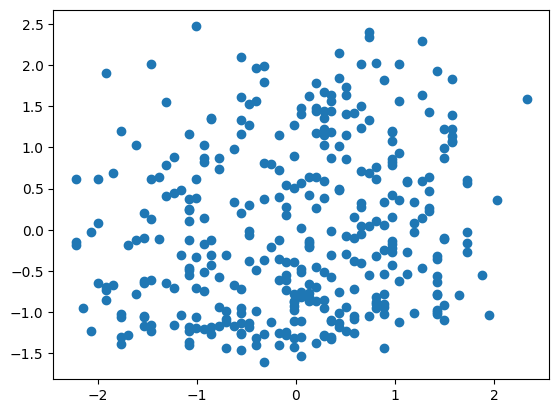

Min:  -2.2211338472651443 Max:  2.3302994813993063 Mean:  6.164411128230331e-17 Std:  1.0


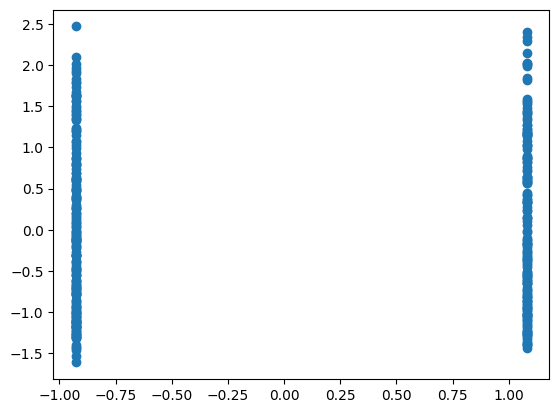

Min:  -0.9262260722102926 Max:  1.0796500228218142 Mean:  3.321233750720015e-16 Std:  1.0000000000000009


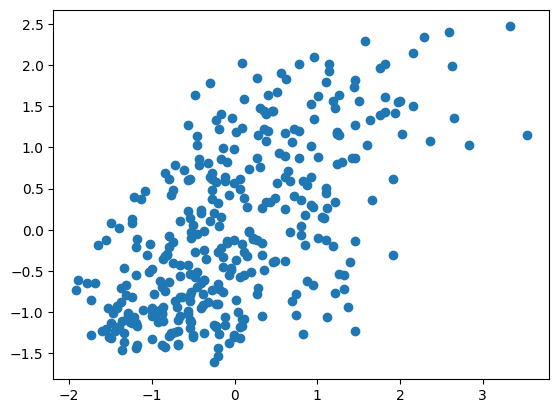

Min:  -1.9174932041558805 Max:  3.5326406989624117 Mean:  -1.0064344699151561e-17 Std:  0.9999999999999998


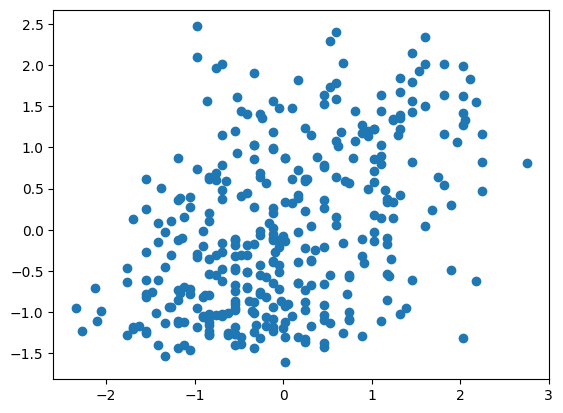

Min:  -2.3393062200092465 Max:  2.751586686529699 Mean:  2.5160861747878902e-17 Std:  0.9999999999999997


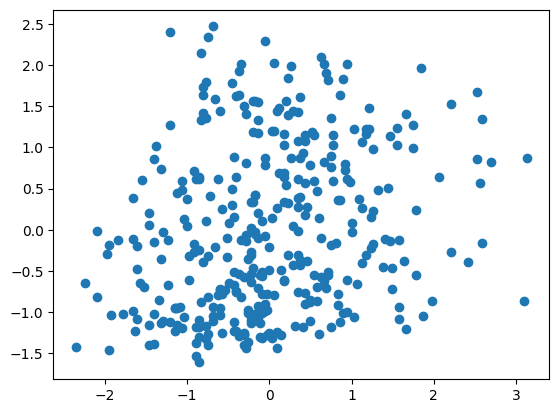

Min:  -2.3514585704910695 Max:  3.1315914450102063 Mean:  -3.0193034097454685e-17 Std:  1.0


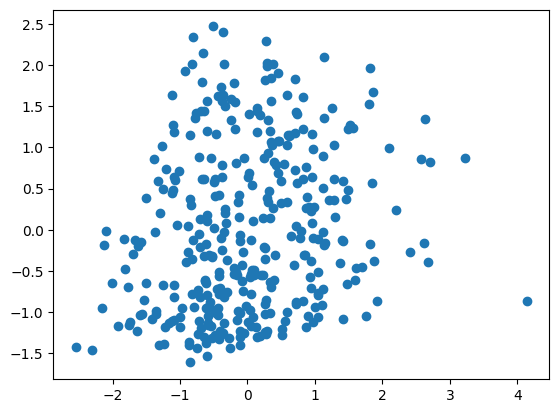

Min:  -2.5432155122389166 Max:  4.140824191904701 Mean:  2.767694792266679e-17 Std:  0.9999999999999993


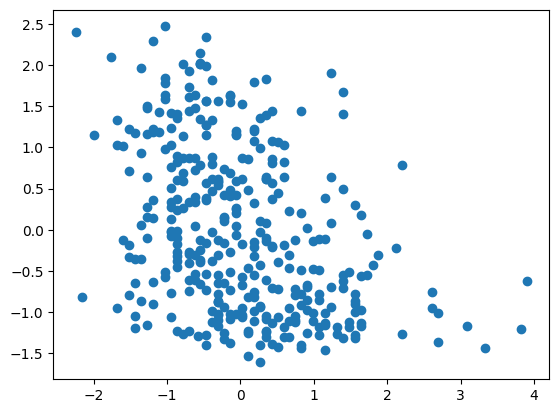

Min:  -2.24147428928296 Max:  3.9018849826058126 Mean:  -5.0321723495757804e-17 Std:  1.0000000000000007


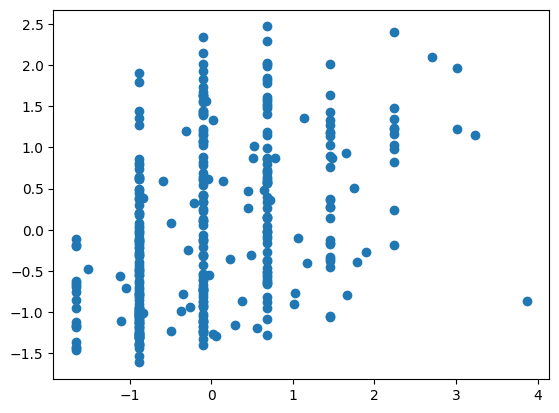

Min:  -1.6580007483373784 Max:  3.8669097565640835 Mean:  1.993998293519403e-16 Std:  1.000000000000001


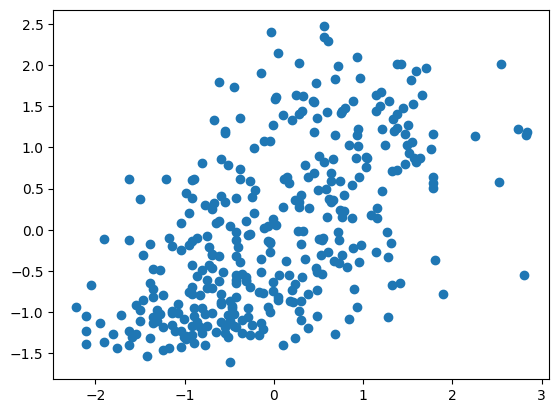

Min:  -2.2189285353791526 Max:  2.8333099089582676 Mean:  0.0 Std:  0.9999999999999996


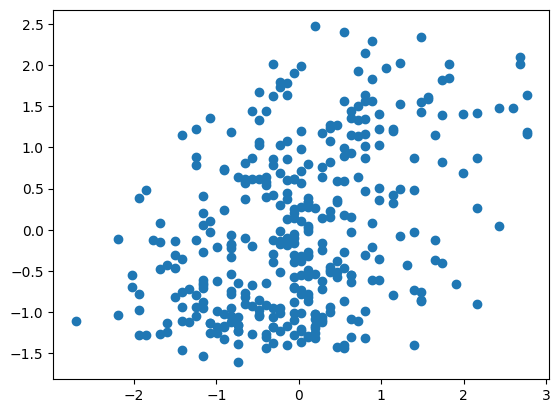

Min:  -2.706161676459996 Max:  2.76672388388234 Mean:  -8.051475759321249e-17 Std:  1.0000000000000004


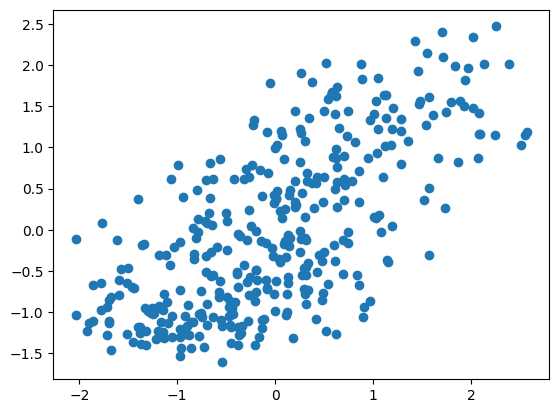

Min:  -2.034639005484523 Max:  2.568927598399298 Mean:  -4.956689764332143e-16 Std:  1.0000000000000002


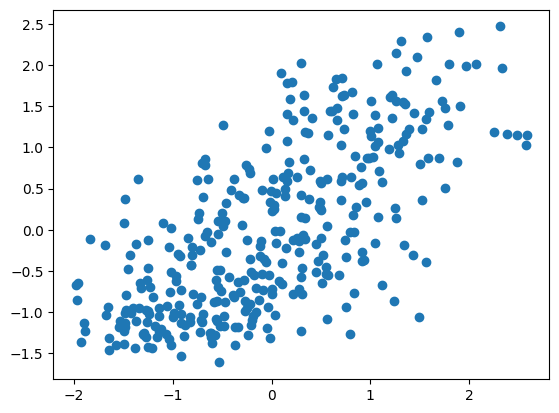

Min:  -1.9821235396880104 Max:  2.585954470625785 Mean:  -8.806301611757615e-18 Std:  1.0


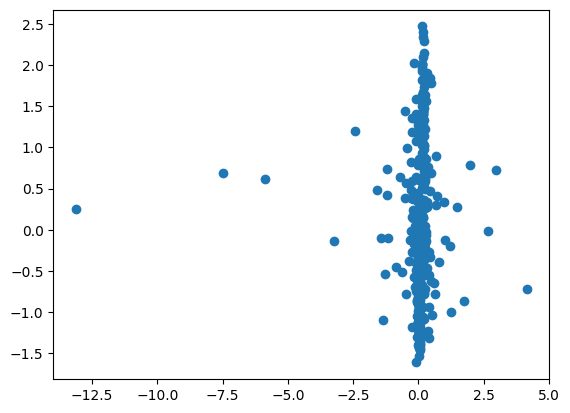

Min:  -13.114618799977013 Max:  4.147356646220903 Mean:  0.0 Std:  1.0


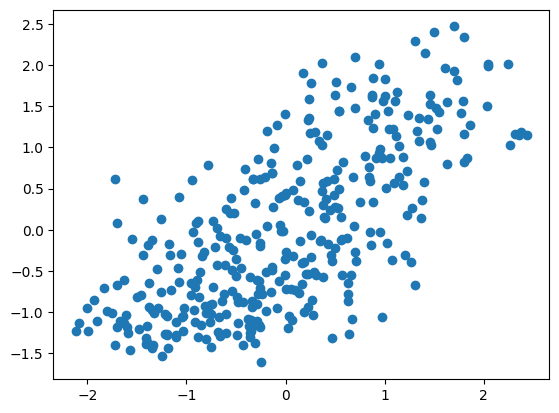

Min:  -2.1162785340080377 Max:  2.434908785992881 Mean:  1.0441757625369744e-16 Std:  1.0


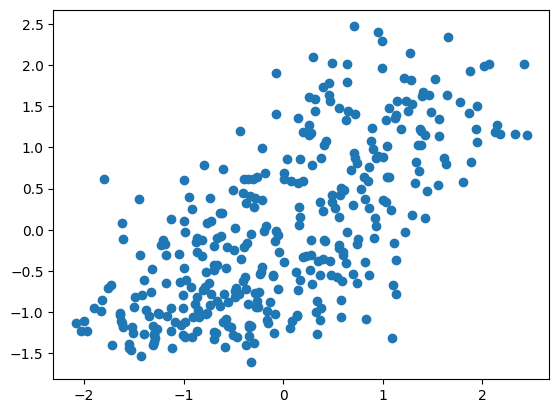

Min:  -2.083296025825987 Max:  2.446763777817479 Mean:  1.7511959776523715e-15 Std:  0.9999999999999999


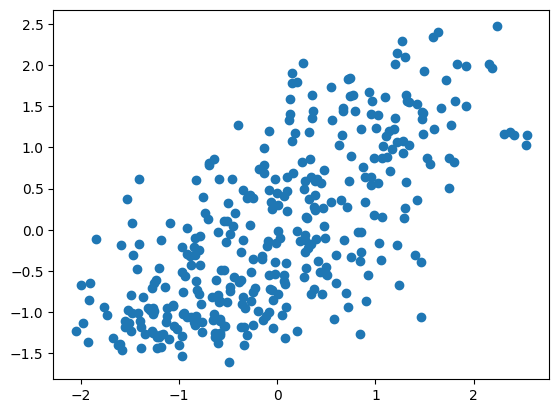

Min:  -2.0525829190925826 Max:  2.5423146231422753 Mean:  -9.095651521858223e-16 Std:  0.9999999999999994


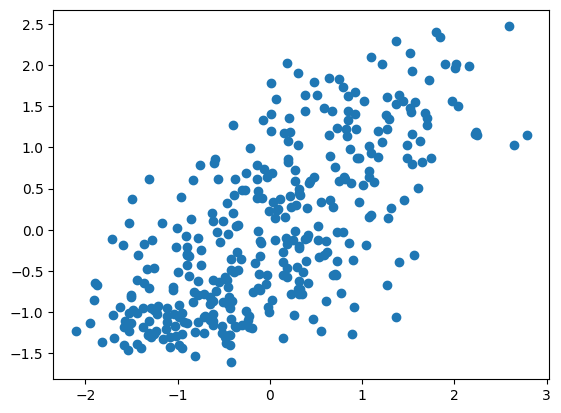

Min:  -2.1014570048990526 Max:  2.783402670118786 Mean:  -8.417566297752887e-15 Std:  1.0


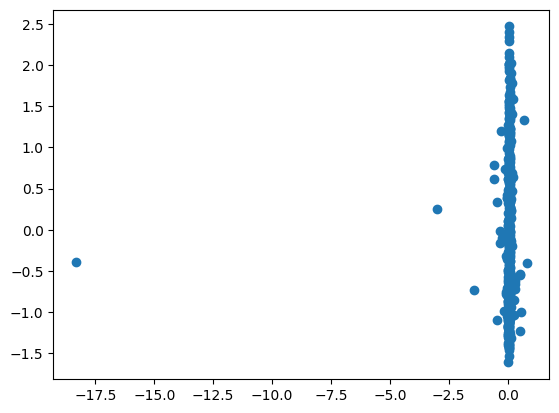

Min:  -18.328577052414754 Max:  0.8131607143327442 Mean:  1.258043087393945e-16 Std:  0.9999999999999999


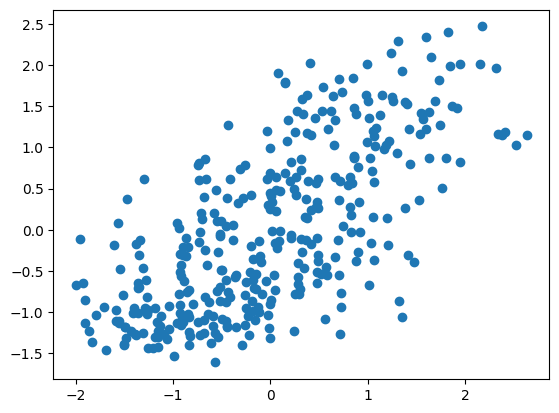

Min:  -2.0013476697625365 Max:  2.6365462133296877 Mean:  -1.1850765883250962e-15 Std:  1.0


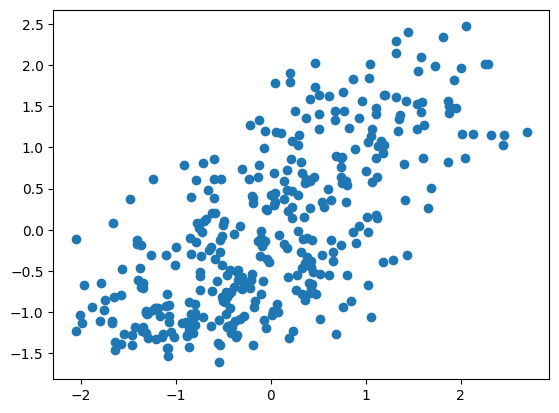

Min:  -2.050722879409729 Max:  2.6947196321930793 Mean:  5.0321723495757804e-17 Std:  1.0


In [14]:
for i in range(tester.new_X_train.shape[1]):
    plt.clf()
    plt.scatter(tester.new_X_train[:, i], tester.y_train)
    plt.show()
    print("Min: ", tester.new_X_train[:, i].min(), "Max: ", tester.new_X_train[:, i].max(), "Mean: ", tester.new_X_train[:, i].mean(), "Std: ", tester.new_X_train[:, i].std())
    